<a href="https://colab.research.google.com/github/malhammam1/my-project/blob/main/Visualization_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/malhammam1/Maha_csci_1070.git

Cloning into 'Maha_csci_1070'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 47 (delta 15), reused 31 (delta 6), pack-reused 0
Receiving objects: 100% (47/47), 149.01 KiB | 2.66 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
%cd Maha_csci_1070

/content/Maha_csci_1070


In [ ]:
!git clone https://github.com/lexmckenz/csci_1070.git

Cloning into 'csci_1070'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 206 (delta 16), reused 29 (delta 6), pack-reused 165
Receiving objects: 100% (206/206), 14.54 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
%cd csci_1070

/content/Maha_csci_1070/csci_1070


In [ ]:
import os

# List all files in the current directory
files = os.listdir('/content')
print(files)

['.config', 'Maha_csci_1070', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

files = os.listdir('/content/Maha_csci_1070/')
print(files)

['quiz5.ipynb', 'archive (1).zip', 'homework_2_questions.ipynb', 'homework_5.ipynb', '.git', 'project_.ipynb', '.gitignore', 'quiz3.ipynb', 'quiz6.ipynb', 'homework6.ipynb', 'csci_1070', 'week_03_homework.ipynb', 'homework_6.ipynb', 'README.md', 'homework.txt', 'homework_1_questions.ipynb']


In [ ]:
import zipfile


zip_path = '/content/Maha_csci_1070/archive (1).zip'

# Unzipping the file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:

        zip_ref.extractall('/content/Maha_csci_1070/')
    print("File unzipped successfully")
except FileNotFoundError:
    print(f"File not found: {zip_path}")
except zipfile.BadZipFile:
    print(f"File is not a zip file or is corrupted")

File unzipped successfully


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from typing import Tuple
import numpy as np

def calculate_metrics(y_true: pd.Series, y_pred: pd.Series) -> Tuple[np.ndarray, str]:
    """
    Calculate and print the confusion matrix and classification report for model predictions.

    Parameters:
    y_true (pd.Series): True labels.
    y_pred (pd.Series): Predicted labels.

    Returns:
    Tuple[np.ndarray, str]: Returns the confusion matrix array and classification report as a string.
    """
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    return cm, cr


df= pd.read_csv('/content/drive/My Drive/Cleaned_Survey_Data.csv')




df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_above_median
0,2014-08-27 11:29:31,37,female,United States,IL,No,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1
1,2014-08-27 11:29:37,44,male,United States,IN,No,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,1
2,2014-08-27 11:29:44,32,male,Canada,NaN,No,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,1
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,0
4,2014-08-27 11:30:22,31,male,United States,TX,No,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0


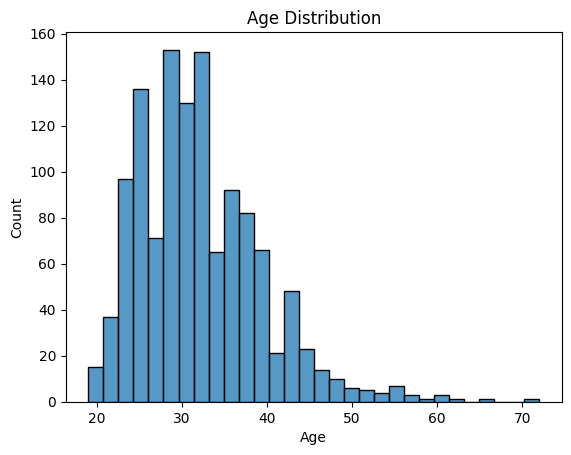

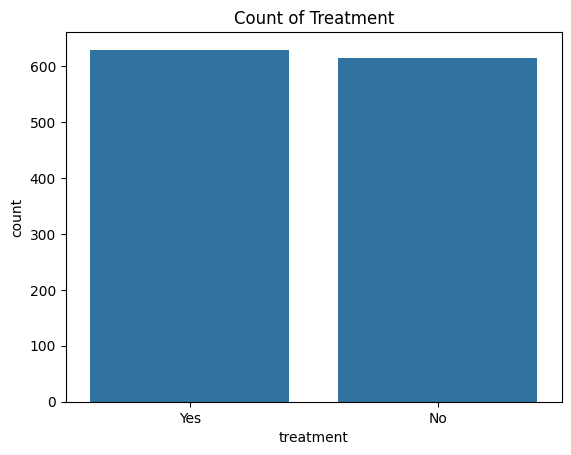

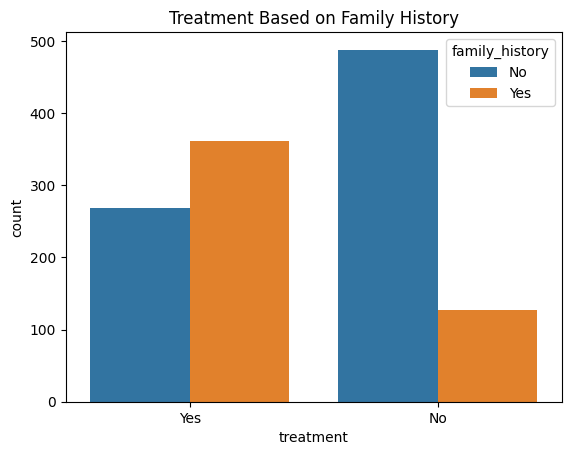

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['Age'], bins=30, kde=False)
plt.title('Age Distribution')
plt.show()


sns.countplot(x='treatment', data=df)
plt.title('Count of Treatment')
plt.show()

sns.countplot(x='treatment', hue='family_history', data=df)
plt.title('Treatment Based on Family History')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history'] = df['family_history'].map({'Yes': 1, 'No': 0})


X = df[['family_history']]
y = df['treatment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[88 22]
 [55 84]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       110
           1       0.79      0.60      0.69       139

    accuracy                           0.69       249
   macro avg       0.70      0.70      0.69       249
weighted avg       0.71      0.69      0.69       249



Random Forest Confusion Matrix:
 [[88 22]
 [55 84]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70       110
           1       0.79      0.60      0.69       139

    accuracy                           0.69       249
   macro avg       0.70      0.70      0.69       249
weighted avg       0.71      0.69      0.69       249



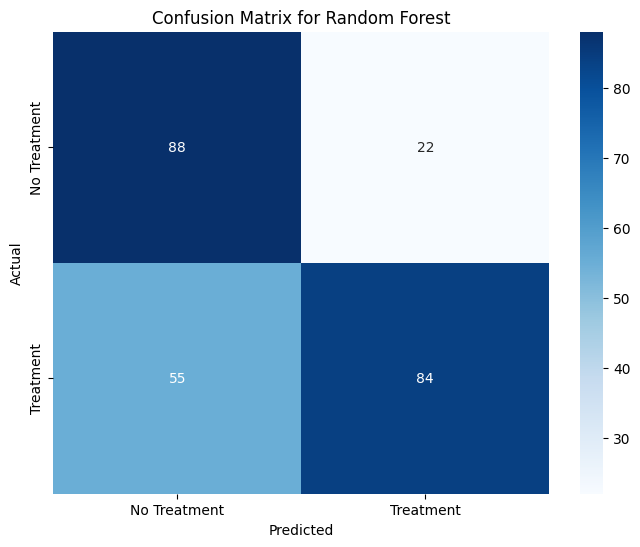

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       110
           1       0.79      0.60      0.69       139

    accuracy                           0.69       249
   macro avg       0.70      0.70      0.69       249
weighted avg       0.71      0.69      0.69       249



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

cm_rf, report_rf = calculate_metrics(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
print("\nRandom Forest Classification Report:\n", report_rf)


plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()


print(classification_report(y_test, y_pred_rf))

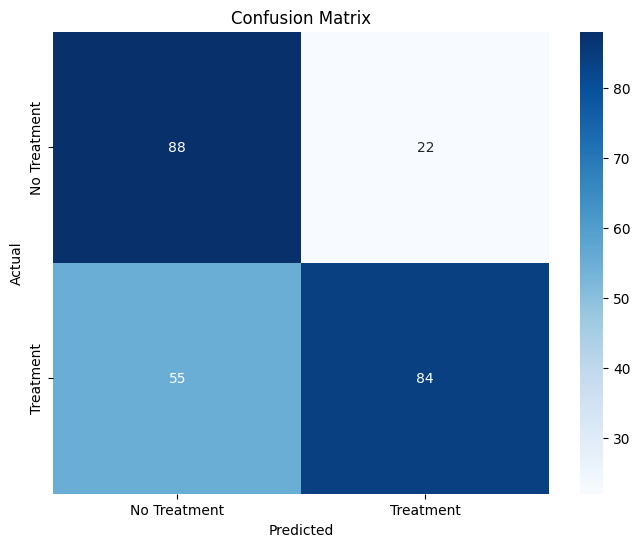

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()